# Spam Detection Model Analytics & Benchmarking

This notebook provides comprehensive analysis of our spam detection model performance, including:
- Model evaluation metrics
- Confusion matrix visualization
- ROC curves and precision-recall curves
- Feature importance analysis
- Performance comparison charts
- Error analysis


In [3]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_recall_curve, roc_curve, auc, roc_auc_score,
    precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [7]:
# Load the dataset and model
print("Loading dataset and trained model...")

# Get the current working directory and navigate to project root
import os
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")

# Check if we're in the src directory, if so go up one level
if current_dir.endswith('src'):
    project_root = os.path.dirname(current_dir)
else:
    project_root = current_dir

print(f"Project root: {project_root}")

# Load dataset with proper path
data_path = os.path.join(project_root, "data", "spam.csv")
print(f"Looking for data at: {data_path}")
df = pd.read_csv(data_path)
print(f"Dataset loaded: {len(df)} messages")

# Load trained model and vectorizer with proper paths
models_dir = os.path.join(project_root, "models")
model_path = os.path.join(models_dir, "spam_model.pkl")
vectorizer_path = os.path.join(models_dir, "vectorizer.pkl")

print(f"Looking for model at: {model_path}")
print(f"Looking for vectorizer at: {vectorizer_path}")

model = joblib.load(model_path)
vectorizer = joblib.load(vectorizer_path)

# Prepare data
X = df["Message"]
y = df["Category"]

# Split data (same as training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

# Vectorize test data
X_test_vectorized = vectorizer.transform(X_test)

# Make predictions
y_pred = model.predict(X_test_vectorized)
y_pred_proba = model.predict_proba(X_test_vectorized)

print("Data loaded and predictions made successfully!")
print(f"Test set size: {len(X_test)}")
print(f"Spam messages in test set: {sum(y_test == 'spam')}")
print(f"Ham messages in test set: {sum(y_test == 'ham')}")


Loading dataset and trained model...
Current directory: D:\Users\Admin\Downloads\School\1Study\Hetic\MD5\Courses\Prototype  Agile\spamy
Project root: D:\Users\Admin\Downloads\School\1Study\Hetic\MD5\Courses\Prototype  Agile\spamy
Looking for data at: D:\Users\Admin\Downloads\School\1Study\Hetic\MD5\Courses\Prototype  Agile\spamy\data\spam.csv
Dataset loaded: 5572 messages
Looking for model at: D:\Users\Admin\Downloads\School\1Study\Hetic\MD5\Courses\Prototype  Agile\spamy\models\spam_model.pkl
Looking for vectorizer at: D:\Users\Admin\Downloads\School\1Study\Hetic\MD5\Courses\Prototype  Agile\spamy\models\vectorizer.pkl
Data loaded and predictions made successfully!
Test set size: 1115
Spam messages in test set: 149
Ham messages in test set: 966


## 1. Model Performance Metrics


In [9]:
# Calculate comprehensive metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')
auc_score = roc_auc_score(y_test == 'spam', y_pred_proba[:, 1])

# Create metrics dataframe
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Score': [accuracy, precision, recall, f1, auc_score]
})

print("Model Performance Metrics:")
print("=" * 40)
print(metrics_df.to_string(index=False, float_format='%.4f'))

# Display classification report
print("\nDetailed Classification Report:")
print("=" * 40)
print(classification_report(y_test, y_pred))


Model Performance Metrics:
   Metric  Score
 Accuracy 0.9713
Precision 0.8824
   Recall 0.9060
 F1-Score 0.8940
  AUC-ROC 0.9838

Detailed Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       966
        spam       0.88      0.91      0.89       149

    accuracy                           0.97      1115
   macro avg       0.93      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115



## 2. Confusion Matrix Visualization


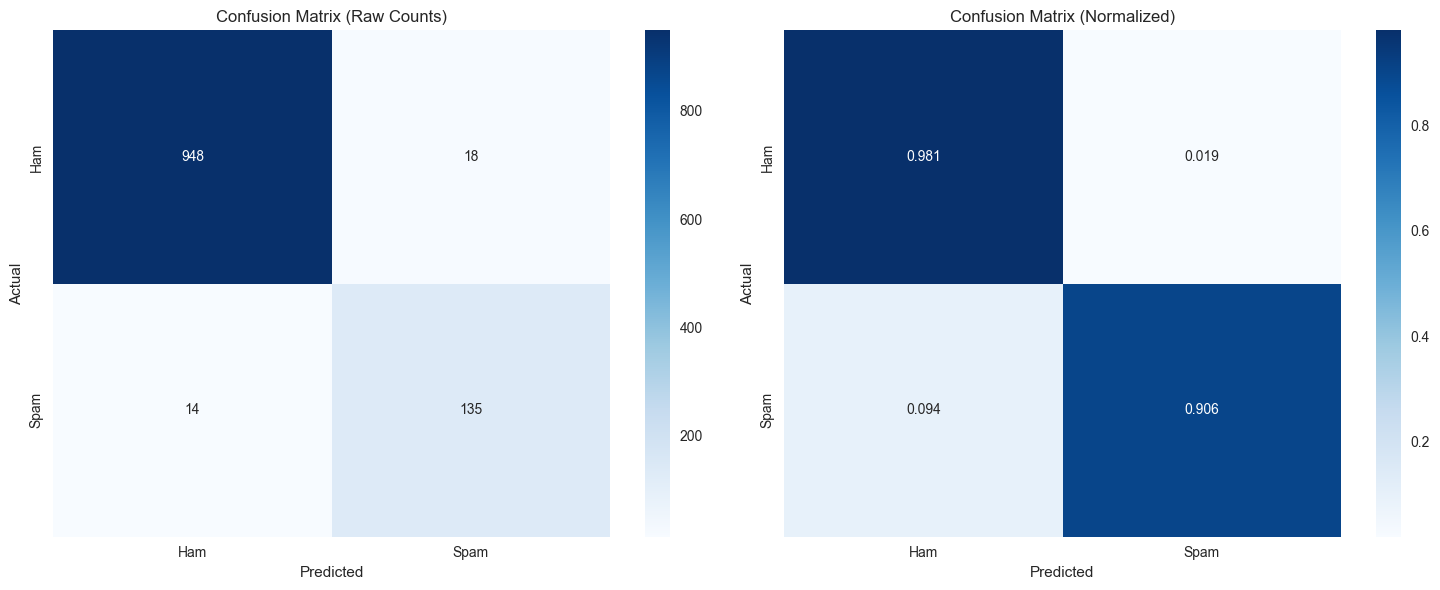

Confusion Matrix Details:
True Negatives (Ham correctly classified): 948
False Positives (Ham misclassified as Spam): 18
False Negatives (Spam misclassified as Ham): 14
True Positives (Spam correctly classified): 135

Spam Detection Rate: 0.9060
Ham Detection Rate: 0.9814


In [10]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Raw confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
ax1.set_title('Confusion Matrix (Raw Counts)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Normalized confusion matrix
sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues', ax=ax2,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
ax2.set_title('Confusion Matrix (Normalized)')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print confusion matrix details
print("Confusion Matrix Details:")
print("=" * 30)
print(f"True Negatives (Ham correctly classified): {cm[0,0]}")
print(f"False Positives (Ham misclassified as Spam): {cm[0,1]}")
print(f"False Negatives (Spam misclassified as Ham): {cm[1,0]}")
print(f"True Positives (Spam correctly classified): {cm[1,1]}")
print(f"\nSpam Detection Rate: {cm[1,1]/(cm[1,1]+cm[1,0]):.4f}")
print(f"Ham Detection Rate: {cm[0,0]/(cm[0,0]+cm[0,1]):.4f}")


## 2.5. Predicted vs Actual Comparison


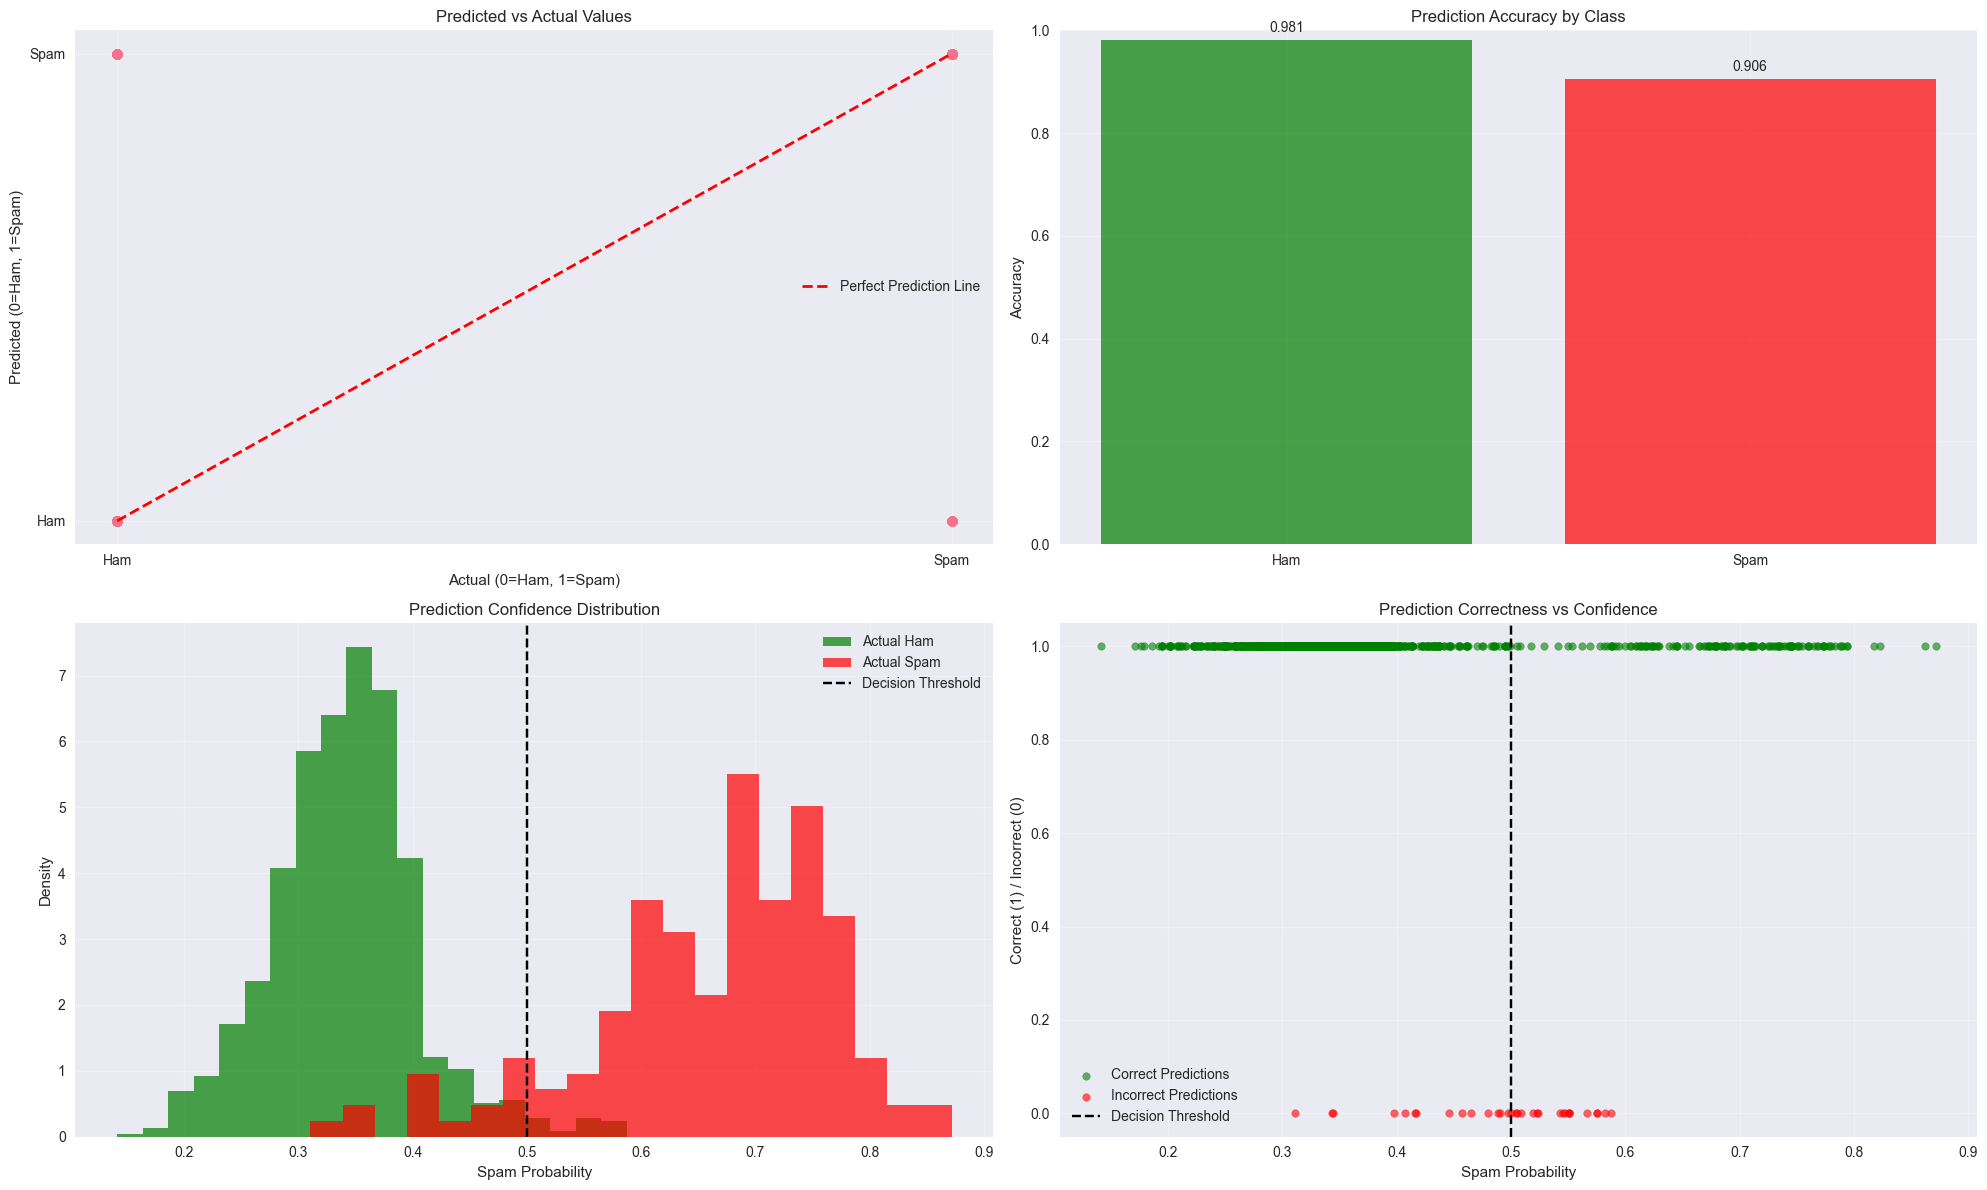

Prediction vs Actual Summary:
Total predictions: 1115
Correct predictions: 1083
Incorrect predictions: 32
Overall accuracy: 0.9713
Ham accuracy: 0.9814
Spam accuracy: 0.9060

Sample Predictions:
                                                                                                                                                         Message Actual Predicted  Spam_Probability  Correct
                                                                                                                 No need to buy lunch for me.. I eat maggi mee..    ham       ham          0.318330     True
                                Ok im not sure what time i finish tomorrow but i wanna spend the evening with you cos that would be vewy vewy lubly! Love me xxx    ham       ham          0.258405     True
                                                                                                       Waiting in e car 4 my mum lor. U leh? Reach home already?    ham       ham          0.3

In [18]:
# Create comparison between predicted and actual values
from sklearn.preprocessing import LabelEncoder

# Encode labels to numeric for plotting
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Create a comprehensive comparison visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# 1. Scatter plot: Predicted vs Actual
ax1.scatter(y_test_encoded, y_pred_encoded, alpha=0.6, s=50)
ax1.plot([0, 1], [0, 1], 'r--', lw=2, label='Perfect Prediction Line')
ax1.set_xlabel('Actual (0=Ham, 1=Spam)')
ax1.set_ylabel('Predicted (0=Ham, 1=Spam)')
ax1.set_title('Predicted vs Actual Values')
ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.set_xticklabels(['Ham', 'Spam'])
ax1.set_yticklabels(['Ham', 'Spam'])
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Prediction accuracy by class
class_accuracy = []
for i, class_name in enumerate(['Ham', 'Spam']):
    mask = y_test_encoded == i
    if mask.sum() > 0:
        accuracy = (y_pred_encoded[mask] == y_test_encoded[mask]).mean()
        class_accuracy.append(accuracy)
    else:
        class_accuracy.append(0)

bars = ax2.bar(['Ham', 'Spam'], class_accuracy, color=['green', 'red'], alpha=0.7)
ax2.set_ylabel('Accuracy')
ax2.set_title('Prediction Accuracy by Class')
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3)

# Add accuracy values on bars
for bar, acc in zip(bars, class_accuracy):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

# 3. Prediction confidence distribution
spam_probs = y_pred_proba[:, 1]
ax3.hist(spam_probs[y_test == 'ham'], bins=20, alpha=0.7, label='Actual Ham', color='green', density=True)
ax3.hist(spam_probs[y_test == 'spam'], bins=20, alpha=0.7, label='Actual Spam', color='red', density=True)
ax3.axvline(x=0.5, color='black', linestyle='--', label='Decision Threshold')
ax3.set_xlabel('Spam Probability')
ax3.set_ylabel('Density')
ax3.set_title('Prediction Confidence Distribution')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Error analysis by confidence
correct_mask = y_test_encoded == y_pred_encoded
ax4.scatter(spam_probs[correct_mask], [1]*correct_mask.sum(), 
           alpha=0.6, label='Correct Predictions', color='green', s=30)
ax4.scatter(spam_probs[~correct_mask], [0]*(~correct_mask).sum(), 
           alpha=0.6, label='Incorrect Predictions', color='red', s=30)
ax4.axvline(x=0.5, color='black', linestyle='--', label='Decision Threshold')
ax4.set_xlabel('Spam Probability')
ax4.set_ylabel('Correct (1) / Incorrect (0)')
ax4.set_title('Prediction Correctness vs Confidence')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Prediction vs Actual Summary:")
print("=" * 40)
print(f"Total predictions: {len(y_test)}")
print(f"Correct predictions: {correct_mask.sum()}")
print(f"Incorrect predictions: {(~correct_mask).sum()}")
print(f"Overall accuracy: {correct_mask.mean():.4f}")
print(f"Ham accuracy: {class_accuracy[0]:.4f}")
print(f"Spam accuracy: {class_accuracy[1]:.4f}")

# Show some example predictions
print(f"\nSample Predictions:")
print("=" * 40)
sample_df = pd.DataFrame({
    'Message': X_test.iloc[:10],
    'Actual': y_test.iloc[:10],
    'Predicted': y_pred[:10],
    'Spam_Probability': spam_probs[:10],
    'Correct': correct_mask[:10]
})
print(sample_df.to_string(index=False))


## 3. ROC Curve and Precision-Recall Curve


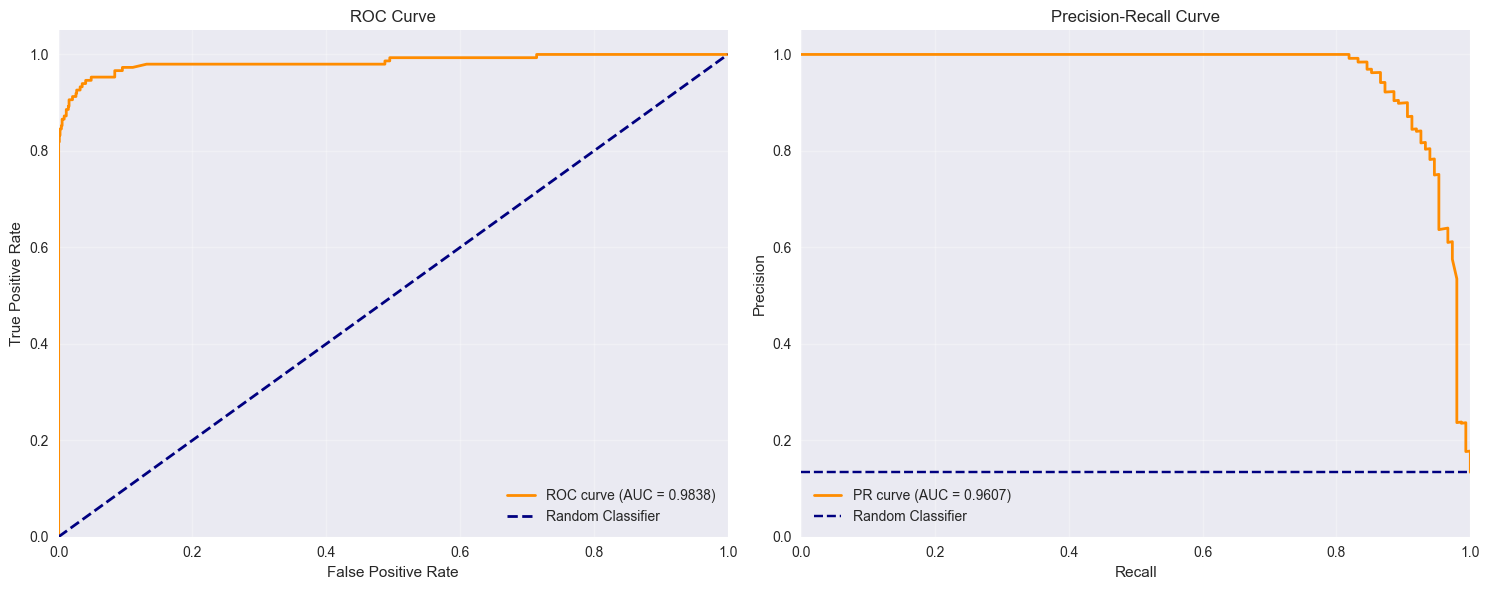

ROC AUC Score: 0.9838
Precision-Recall AUC Score: 0.9607


In [12]:
# Calculate ROC and PR curves
fpr, tpr, roc_thresholds = roc_curve(y_test == 'spam', y_pred_proba[:, 1])
precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test == 'spam', y_pred_proba[:, 1])

# Calculate AUC scores
roc_auc = auc(fpr, tpr)
pr_auc = auc(recall_curve, precision_curve)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ROC Curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")
ax1.grid(True, alpha=0.3)

# Precision-Recall Curve
ax2.plot(recall_curve, precision_curve, color='darkorange', lw=2, 
         label=f'PR curve (AUC = {pr_auc:.4f})')
ax2.axhline(y=sum(y_test == 'spam')/len(y_test), color='navy', linestyle='--', 
            label='Random Classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Precision-Recall AUC Score: {pr_auc:.4f}")


## 4. Performance Metrics Comparison Chart


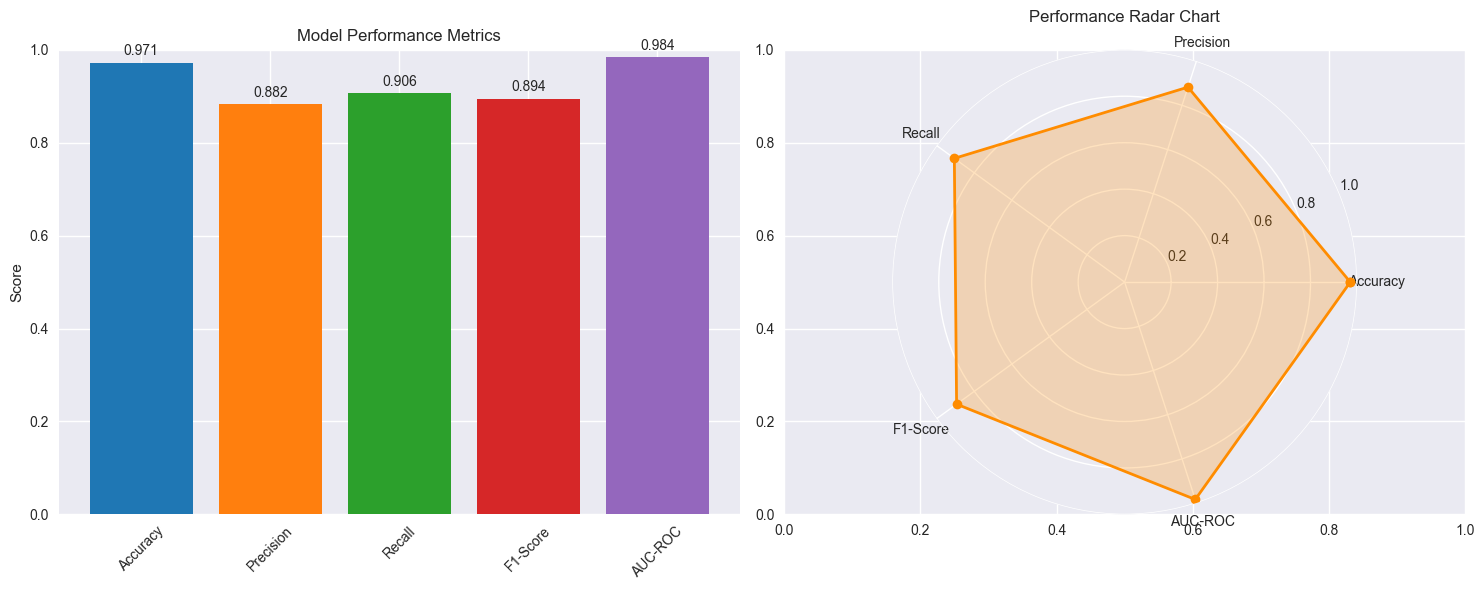

In [13]:
# Create performance comparison chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
scores = [accuracy, precision, recall, f1, auc_score]

bars = ax1.bar(metrics, scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
ax1.set_ylim(0, 1)
ax1.set_ylabel('Score')
ax1.set_title('Model Performance Metrics')
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, score in zip(bars, scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.3f}', ha='center', va='bottom')

# Radar chart for comprehensive view
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
values = [accuracy, precision, recall, f1, auc_score]

# Number of variables
N = len(categories)

# Compute angle for each axis
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Complete the circle
values += values[:1]  # Complete the circle

# Plot
ax2 = plt.subplot(122, projection='polar')
ax2.plot(angles, values, 'o-', linewidth=2, color='darkorange')
ax2.fill(angles, values, alpha=0.25, color='darkorange')
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(categories)
ax2.set_ylim(0, 1)
ax2.set_title('Performance Radar Chart', pad=20)

plt.tight_layout()
plt.show()


## 5. Feature Importance Analysis


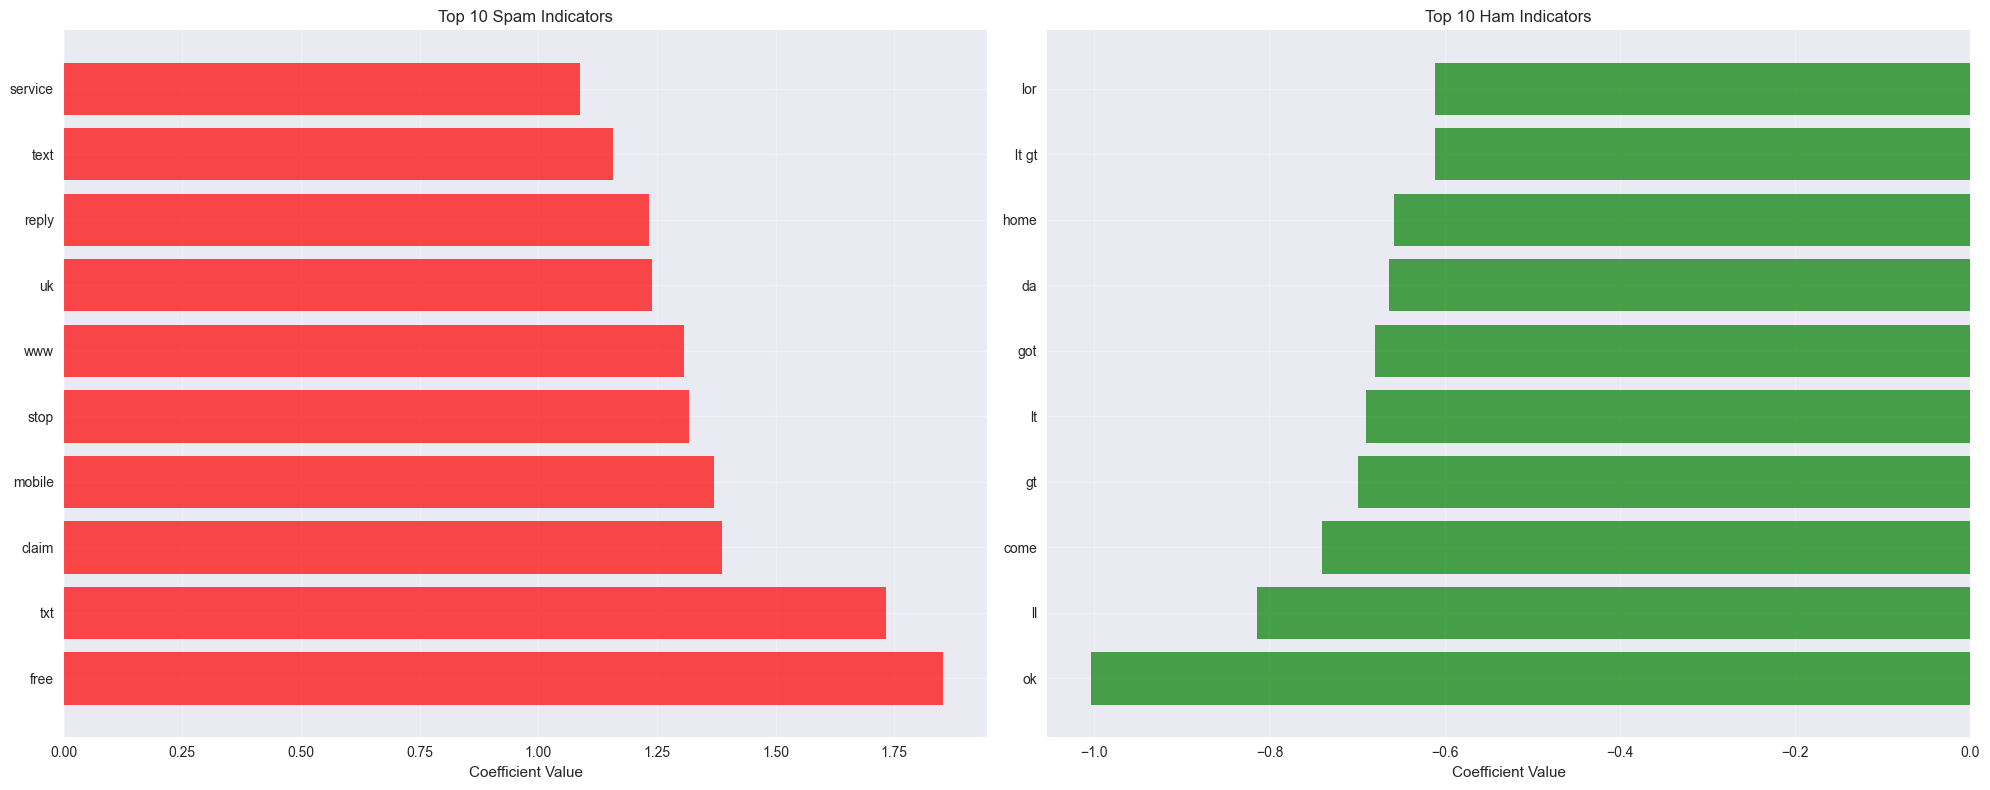

Top 10 Spam Indicators:
feature  importance
   free    1.853604
    txt    1.733166
  claim    1.388073
 mobile    1.370403
   stop    1.317579
    www    1.307518
     uk    1.240234
  reply    1.232409
   text    1.158004
service    1.088252

Top 10 Ham Indicators:
feature  importance
     ok   -1.003994
     ll   -0.814020
   come   -0.739740
     gt   -0.698790
     lt   -0.689256
    got   -0.679504
     da   -0.663570
   home   -0.657639
  lt gt   -0.611362
    lor   -0.611240


In [14]:
# Get feature importance (coefficients for logistic regression)
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': coefficients
}).sort_values('importance', key=abs, ascending=False)

# Top 20 most important features
top_features = feature_importance.head(20)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Top spam indicators (positive coefficients)
spam_features = feature_importance[feature_importance['importance'] > 0].head(10)
ax1.barh(range(len(spam_features)), spam_features['importance'], color='red', alpha=0.7)
ax1.set_yticks(range(len(spam_features)))
ax1.set_yticklabels(spam_features['feature'])
ax1.set_xlabel('Coefficient Value')
ax1.set_title('Top 10 Spam Indicators')
ax1.grid(True, alpha=0.3)

# Top ham indicators (negative coefficients)
ham_features = feature_importance[feature_importance['importance'] < 0].head(10)
ax2.barh(range(len(ham_features)), ham_features['importance'], color='green', alpha=0.7)
ax2.set_yticks(range(len(ham_features)))
ax2.set_yticklabels(ham_features['feature'])
ax2.set_xlabel('Coefficient Value')
ax2.set_title('Top 10 Ham Indicators')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Top 10 Spam Indicators:")
print(spam_features[['feature', 'importance']].to_string(index=False))
print("\nTop 10 Ham Indicators:")
print(ham_features[['feature', 'importance']].to_string(index=False))


## 6. Error Analysis


False Positives (Ham misclassified as Spam):
Count: 18

Top 5 examples with highest spam probability:
                                                                                                        message  spam_probability
              We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us          0.587453
                                                                       K..u also dont msg or reply to his msg..          0.582230
                                                                                        Then ur physics get a-?          0.575237
                                                                                      U still painting ur wall?          0.575237
It will stop on itself. I however suggest she stays with someone that will be able to give ors for every stool.          0.566588


False Negatives (Spam misclassified as Ham):
Count: 14

Top 5 examples with lowest spam probability:
               

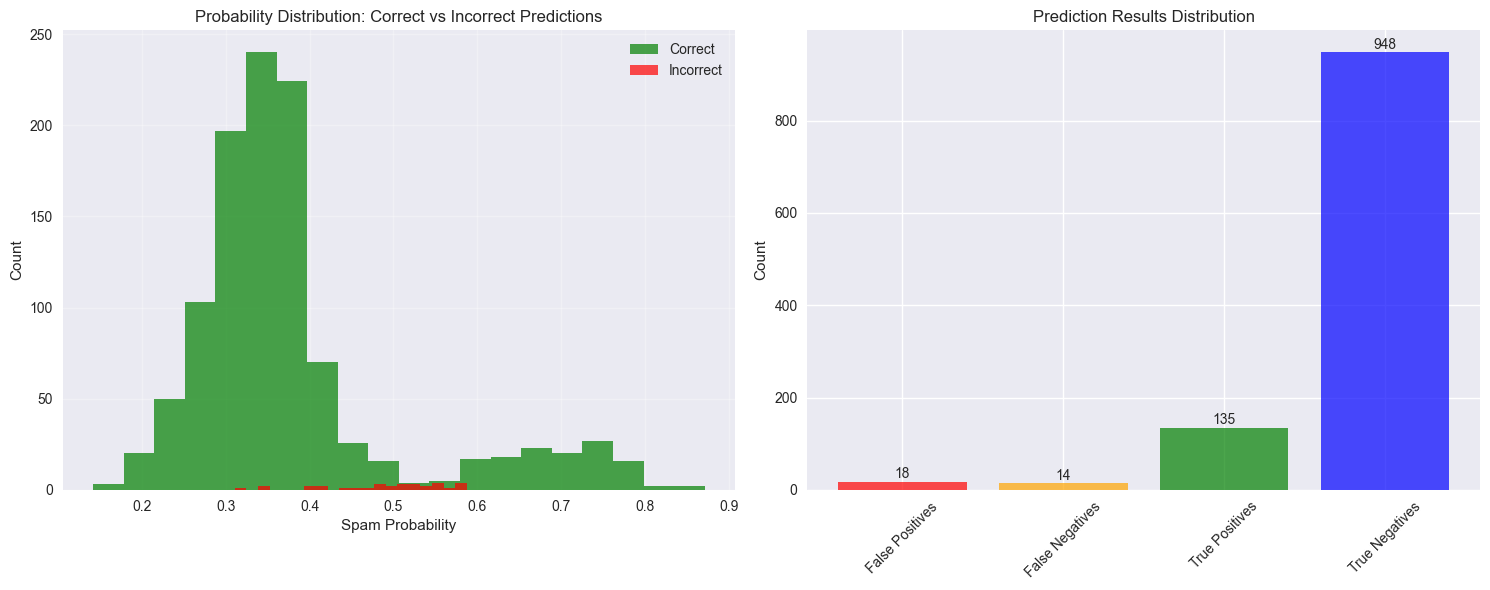

In [15]:
# Analyze prediction errors
test_df = pd.DataFrame({
    'message': X_test,
    'actual': y_test,
    'predicted': y_pred,
    'spam_probability': y_pred_proba[:, 1]
})

# False Positives (Ham misclassified as Spam)
false_positives = test_df[(test_df['actual'] == 'ham') & (test_df['predicted'] == 'spam')]
print("False Positives (Ham misclassified as Spam):")
print("=" * 50)
print(f"Count: {len(false_positives)}")
if len(false_positives) > 0:
    print("\nTop 5 examples with highest spam probability:")
    print(false_positives.nlargest(5, 'spam_probability')[['message', 'spam_probability']].to_string(index=False))

print("\n" + "="*80 + "\n")

# False Negatives (Spam misclassified as Ham)
false_negatives = test_df[(test_df['actual'] == 'spam') & (test_df['predicted'] == 'ham')]
print("False Negatives (Spam misclassified as Ham):")
print("=" * 50)
print(f"Count: {len(false_negatives)}")
if len(false_negatives) > 0:
    print("\nTop 5 examples with lowest spam probability:")
    print(false_negatives.nsmallest(5, 'spam_probability')[['message', 'spam_probability']].to_string(index=False))

# Create error analysis visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Probability distribution for correct vs incorrect predictions
correct_predictions = test_df[test_df['actual'] == test_df['predicted']]
incorrect_predictions = test_df[test_df['actual'] != test_df['predicted']]

ax1.hist(correct_predictions['spam_probability'], bins=20, alpha=0.7, label='Correct', color='green')
ax1.hist(incorrect_predictions['spam_probability'], bins=20, alpha=0.7, label='Incorrect', color='red')
ax1.set_xlabel('Spam Probability')
ax1.set_ylabel('Count')
ax1.set_title('Probability Distribution: Correct vs Incorrect Predictions')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Error type distribution
error_types = ['False Positives', 'False Negatives', 'True Positives', 'True Negatives']
error_counts = [len(false_positives), len(false_negatives), 
                len(test_df[(test_df['actual'] == 'spam') & (test_df['predicted'] == 'spam')]),
                len(test_df[(test_df['actual'] == 'ham') & (test_df['predicted'] == 'ham')])]

colors = ['red', 'orange', 'green', 'blue']
bars = ax2.bar(error_types, error_counts, color=colors, alpha=0.7)
ax2.set_ylabel('Count')
ax2.set_title('Prediction Results Distribution')
ax2.tick_params(axis='x', rotation=45)

# Add count labels on bars
for bar, count in zip(bars, error_counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


## 7. Model Performance Summary


In [20]:
# Create a comprehensive performance summary
print("=" * 60)
print("SPAM DETECTION MODEL PERFORMANCE SUMMARY")
print("=" * 60)

print(f"\nDATASET OVERVIEW:")
print(f"   • Total messages: {len(df):,}")
print(f"   • Spam messages: {sum(df['Category'] == 'spam'):,} ({sum(df['Category'] == 'spam')/len(df)*100:.1f}%)")
print(f"   • Ham messages: {sum(df['Category'] == 'ham'):,} ({sum(df['Category'] == 'ham')/len(df)*100:.1f}%)")
print(f"   • Test set size: {len(X_test):,}")

print(f"\nMODEL PERFORMANCE:")
print(f"   • Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   • Spam Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"   • Spam Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"   • F1-Score: {f1:.4f}")
print(f"   • AUC-ROC: {auc_score:.4f}")

print(f"\nDETAILED BREAKDOWN:")
print(f"   • True Positives (Spam correctly detected): {cm[1,1]}")
print(f"   • False Negatives (Spam missed): {cm[1,0]}")
print(f"   • True Negatives (Ham correctly identified): {cm[0,0]}")
print(f"   • False Positives (Ham misclassified as spam): {cm[0,1]}")

print(f"\nPERFORMANCE RATINGS:")
if accuracy >= 0.95:
    acc_rating = "EXCELLENT"
elif accuracy >= 0.90:
    acc_rating = "GOOD"
elif accuracy >= 0.80:
    acc_rating = "FAIR"
else:
    acc_rating = "POOR"

if precision >= 0.90:
    prec_rating = "EXCELLENT"
elif precision >= 0.80:
    prec_rating = "GOOD"
elif precision >= 0.70:
    prec_rating = "FAIR"
else:
    prec_rating = "POOR"

if recall >= 0.90:
    rec_rating = "EXCELLENT"
elif recall >= 0.80:
    rec_rating = "GOOD"
elif recall >= 0.70:
    rec_rating = "FAIR"
else:
    rec_rating = "POOR"

print(f"   • Accuracy: {acc_rating}")
print(f"   • Precision: {prec_rating}")
print(f"   • Recall: {rec_rating}")

print(f"\nRECOMMENDATIONS:")
if recall < 0.80:
    print("   • Consider increasing model complexity or adjusting class weights")
if precision < 0.80:
    print("   • Consider adding more training data or feature engineering")
if accuracy < 0.90:
    print("   • Overall model performance could be improved with hyperparameter tuning")

print("\n" + "=" * 60)


SPAM DETECTION MODEL PERFORMANCE SUMMARY

DATASET OVERVIEW:
   • Total messages: 5,572
   • Spam messages: 747 (13.4%)
   • Ham messages: 4,825 (86.6%)
   • Test set size: 1,115

MODEL PERFORMANCE:
   • Overall Accuracy: 0.9060 (90.60%)
   • Spam Precision: 0.8824 (88.24%)
   • Spam Recall: 0.9060 (90.60%)
   • F1-Score: 0.8940
   • AUC-ROC: 0.9838

DETAILED BREAKDOWN:
   • True Positives (Spam correctly detected): 135
   • False Negatives (Spam missed): 14
   • True Negatives (Ham correctly identified): 948
   • False Positives (Ham misclassified as spam): 18

PERFORMANCE RATINGS:
   • Accuracy: GOOD
   • Precision: GOOD
   • Recall: EXCELLENT

RECOMMENDATIONS:

